Inštalácia potrebných knižníc

In [1]:
!pip install tensorflow opencv-python matplotlib
!pip install --upgrade tensorflow

  Using cached ml_dtypes-0.2.0-cp39-cp39-win_amd64.whl (938 kB)
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.3.2
    Uninstalling ml-dtypes-0.3.2:
      Successfully uninstalled ml-dtypes-0.3.2
  Using cached tensorflow-2.16.1-cp39-cp39-win_amd64.whl (2.1 kB)
  Using cached tensorflow_intel-2.16.1-cp39-cp39-win_amd64.whl (376.9 MB)
  Using cached tensorboard-2.16.2-py3-none-any.whl (5.5 MB)
  Using cached ml_dtypes-0.3.2-cp39-cp39-win_amd64.whl (127 kB)
  Using cached h5py-3.11.0-cp39-cp39-win_amd64.whl (3.0 MB)
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.2.0
    Uninstalling ml-dtypes-0.2.0:
      Successfully uninstalled ml-dtypes-0.2.0
  Attempting uninstall: h5py
    Found existing installation: h5py 3.6.0
    Uninstalling h5py-3.6.0:
      Successfully uninstalled h5py-3.6.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.15.2
    Uninstalling tensorboard-2.15.2:
      Successfu

In [6]:
import tensorflow as tf
import os

Vymazanie nevyhovujúcich obrázkov

In [40]:
import cv2
import imghdr

In [57]:
data_src = 'data'

In [58]:
os.listdir(data_src)

['cats', 'dogs']

In [59]:
allowed_extensions = ['jpeg','jpg', 'bmp', 'png']

In [60]:
allowed_extensions

['jpeg', 'jpg', 'bmp', 'png']

In [61]:
for image_class in os.listdir(data_src): 
    for image in os.listdir(os.path.join(data_src, image_class)):
        image_path = os.path.join(data_src, image_class, image)
        try: 
            can_open_with_cv = cv2.imread(image_path)
            right_extension = imghdr.what(image_path)
            if right_extension not in allowed_extensions: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            os.remove(image_path)

Načítanie dát

In [62]:
import numpy as np
from matplotlib import pyplot as plt

In [63]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 140 files belonging to 2 classes.


In [64]:
data_iterator = data.as_numpy_iterator()

In [65]:
batch = data_iterator.next()

In [66]:
batch

(array([[[[191.17578 , 168.4406  , 127.97023 ],
          [197.92726 , 170.92726 , 125.06789 ],
          [189.68456 , 161.93428 , 111.80942 ],
          ...,
          [110.856155, 112.44977 ,  96.481155],
          [147.90839 , 145.13252 , 125.99675 ],
          [189.39035 , 179.76778 , 155.95595 ]],
 
         [[198.57085 , 173.79889 , 132.14749 ],
          [218.2271  , 189.96645 , 143.80966 ],
          [213.89062 , 188.25699 , 139.44017 ],
          ...,
          [203.90564 , 193.713   , 173.56456 ],
          [229.47763 , 217.71094 , 195.69868 ],
          [223.42632 , 209.23935 , 185.96834 ]],
 
         [[188.28152 , 160.66797 , 115.32045 ],
          [214.16756 , 186.16756 , 138.90584 ],
          [221.71484 , 198.42969 , 152.65097 ],
          ...,
          [233.5664  , 216.14062 , 192.75528 ],
          [237.93544 , 222.55263 , 202.67845 ],
          [222.09361 , 211.988   , 193.60951 ]],
 
         ...,
 
         [[167.29208 , 138.51447 ,  94.21382 ],
          [170.333

Optimalizácia/škálovanie dát

In [67]:
data = data.map(lambda x,y: (x/255, y))

In [68]:
data.as_numpy_iterator().next()

(array([[[[7.43967667e-02, 9.00830403e-02, 1.37141868e-01],
          [9.18525830e-02, 1.07538857e-01, 1.54597685e-01],
          [1.20007746e-01, 1.35694012e-01, 1.82752848e-01],
          ...,
          [5.03278196e-01, 3.15042883e-01, 1.66023284e-01],
          [5.32276332e-01, 3.53063732e-01, 2.13832721e-01],
          [4.80269611e-01, 3.31770837e-01, 2.14644611e-01]],
 
         [[7.62101710e-02, 9.18964446e-02, 1.38955265e-01],
          [1.04188271e-01, 1.19874544e-01, 1.66933373e-01],
          [1.06224209e-01, 1.21910483e-01, 1.68969303e-01],
          ...,
          [5.02915382e-01, 3.14680099e-01, 1.65660486e-01],
          [5.21764219e-01, 3.42551619e-01, 2.03320608e-01],
          [4.82716411e-01, 3.34217638e-01, 2.17091396e-01]],
 
         [[7.57320598e-02, 9.14183408e-02, 1.38477162e-01],
          [1.13275625e-01, 1.28961906e-01, 1.76020727e-01],
          [8.86344165e-02, 1.04320690e-01, 1.51379511e-01],
          ...,
          [5.01410127e-01, 3.13174844e-01, 1.6415

Rozdelenie dát

In [69]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [70]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

Vytvorenie modelu

In [71]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [72]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [73]:
model = Sequential()

In [74]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

C:\Users\boris\anaconda3\lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [75]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [76]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 16)          │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 14400)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       3,686,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

Trénovanie modelu

In [77]:
log_dir='logs'

In [78]:
callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir)

In [80]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[callback])

Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 404ms/step - accuracy: 0.4792 - loss: 0.9924 - val_accuracy: 0.5312 - val_loss: 0.7847
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 348ms/step - accuracy: 0.5260 - loss: 0.7695 - val_accuracy: 0.5312 - val_loss: 0.6902
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 406ms/step - accuracy: 0.4727 - loss: 0.6948 - val_accuracy: 0.5312 - val_loss: 0.6899
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 336ms/step - accuracy: 0.5846 - loss: 0.6894 - val_accuracy: 0.7812 - val_loss: 0.6840
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 350ms/step - accuracy: 0.7318 - loss: 0.6826 - val_accuracy: 0.5625 - val_loss: 0.6646
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 326ms/step - accuracy: 0.6393 - loss: 0.6674 - val_accuracy: 0.5312 - val_loss: 0.6702
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 385ms/step - accuracy: 0.6094 - loss: 0.6455 - val_accuracy: 0.6250 - val_loss: 0.6438
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 378ms/step - accuracy: 0.6354 - loss: 0.6440 - val_accuracy: 0.7812 - val_loss:

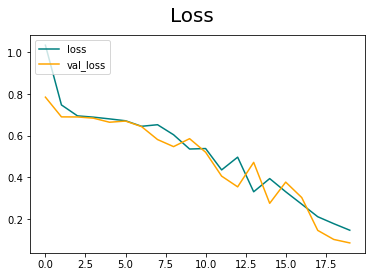

In [138]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

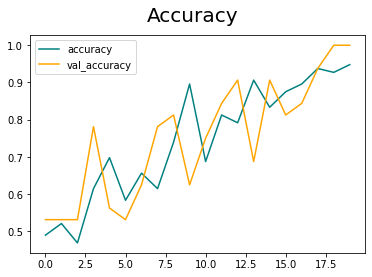

In [139]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

Použitie KNN (K-Nearest Neighbors)

In [90]:
from skimage.feature import hog
import numpy as np
import cv2
import matplotlib.pyplot as plt
from matplotlib import image as mpimg
import os
import glob
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

image:  (769, 615, 3)


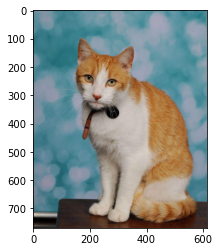

In [95]:
img = np.array(mpimg.imread("data/cats/cat_1.jpg"))
img.setflags(write=1)
print("image: ", img.shape)
plt.imshow(img)
plt.show()

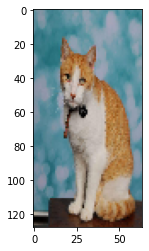

(128, 64, 3)


In [96]:
resized_img = cv2.resize(img,(64, 128))
plt.imshow(resized_img)
plt.show()
print(resized_img.shape)

C:\Users\boris\AppData\Local\Temp\ipykernel_13768\4071584347.py:1: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  fd, hog_image = hog(resized_img, visualize=True, multichannel=True)


(6804,)
[0.26244726 0.02542473 0.         ... 0.0062941  0.01682134 0.06172441]
(128, 64)


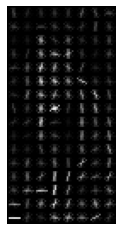

In [97]:
fd, hog_image = hog(resized_img, visualize=True, multichannel=True)
print(fd.shape)
print(fd)
print(hog_image.shape)
plt.axis("off")
plt.imshow(hog_image, cmap="gray")
plt.show()

In [99]:
data_dogs = []
for entry in glob.glob("data2/training_setHOG/dogs/*.jpg"):
    img = cv2.imread(entry)
    resized_img = cv2.resize(img, (64, 128))
    gray_img = cv2.cvtColor(resized_img, cv2.COLOR_BGR2GRAY)
    fd = hog(gray_img, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), block_norm='L2-Hys')
    data_dogs.append(fd)


In [100]:
data_cats = []
for entry in glob.glob("data2/training_setHOG/cats/*.jpg"):
    img = cv2.imread(entry)
    resized_img = cv2.resize(img, (64, 128))
    gray_img = cv2.cvtColor(resized_img, cv2.COLOR_BGR2GRAY)
    fd = hog(gray_img, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), block_norm='L2-Hys')
    data_cats.append(fd)


In [101]:
train_data = data_cats + data_dogs
print(len(train_data))

112


In [102]:
train_lable_list = []
for i in range(len(train_data)):
    if i < 56:
        train_lable_list.append('cat')
    else:
        train_lable_list.append('dog')
print(train_lable_list)
print(len(train_lable_list))

['cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog']
112


In [106]:
test_dogs = []
for entry in glob.glob("data2/test_setHOG/dogs/*.jpg"):
    img = cv2.imread(entry)
    resized_img = cv2.resize(img, (64, 128))
    gray_img = cv2.cvtColor(resized_img, cv2.COLOR_BGR2GRAY)
    fd = hog(gray_img, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), block_norm='L2-Hys')
    test_dict = {'data':fd, 'label':'dog'}
    test_dogs.append(test_dict)

In [107]:
test_cats = []
for entry in glob.glob("data2/test_setHOG/cats/*.jpg"):
    img = cv2.imread(entry)
    resized_img = cv2.resize(img, (64, 128))
    gray_img = cv2.cvtColor(resized_img, cv2.COLOR_BGR2GRAY)
    fd = hog(gray_img, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), block_norm='L2-Hys')
    test_dict = {'data':fd, 'label':'dog'}
    test_cats.append(test_dict)

In [108]:
test_data = test_cats + test_dogs
print(len(test_data))

28


In [109]:
test_features = []
test_labels = []
for i in test_data:
    test_labels.append(i['label'])
    test_features.append(i['data'])
print(len(test_features))
print(test_labels)

28
['dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog']


In [110]:
x_axis_k_points_euclidean = []

f1_euclidean = []
accuracies_euclidean = []
conf_matrix_euclidean = []

for k in range(7):
    knn_euclidean = KNeighborsClassifier(k+1)
    knn_euclidean.fit(train_data, train_lable_list)
    pred_labels_euclidean = knn_euclidean.predict(test_features)
    acc_euclidean = knn_euclidean.score(test_features, test_labels)
    accuracies_euclidean.append(acc_euclidean)
    conf_matrix_euclidean.append(metrics.confusion_matrix(test_labels,pred_labels_euclidean))
    f1_euclidean.append(metrics.f1_score(test_labels, pred_labels_euclidean, pos_label='dog'))
    x_axis_k_points_euclidean.append(k+1)

In [111]:
x_axis_k_points_manhattan = []

f1_manhattan = []
accuracies_manhattan = []
conf_matrix_manhattan = []

for k in range(7):
    knn_manhattan = KNeighborsClassifier(k+1, p=1)
    knn_manhattan.fit(train_data, train_lable_list)
    pred_labels_manhattan = knn_manhattan.predict(test_features)
    acc_manhattan = knn_manhattan.score(test_features, test_labels)
    accuracies_manhattan.append(acc_manhattan)
    conf_matrix_manhattan.append(metrics.confusion_matrix(test_labels,pred_labels_manhattan))
    f1_manhattan.append(metrics.f1_score(test_labels, pred_labels_manhattan, pos_label='dog'))
    x_axis_k_points_manhattan.append(k+1)

In [203]:
for i in range(len(f1_manhattan)):
    print("FOR k = ", i+1,", F1 score= ", f1_manhattan[i], ", ACCURACY= ", accuracies_manhattan[i], 
          "CONFUSION MATRIX= ", conf_matrix_manhattan)

FOR k =  1 , F1 score=  0.4 , ACCURACY=  0.25 CONFUSION MATRIX=  [array([[ 0,  0],
       [21,  7]], dtype=int64), array([[ 0,  0],
       [27,  1]], dtype=int64), array([[ 0,  0],
       [20,  8]], dtype=int64), array([[ 0,  0],
       [23,  5]], dtype=int64), array([[ 0,  0],
       [20,  8]], dtype=int64), array([[ 0,  0],
       [22,  6]], dtype=int64), array([[ 0,  0],
       [17, 11]], dtype=int64)]
FOR k =  2 , F1 score=  0.0689655172413793 , ACCURACY=  0.03571428571428571 CONFUSION MATRIX=  [array([[ 0,  0],
       [21,  7]], dtype=int64), array([[ 0,  0],
       [27,  1]], dtype=int64), array([[ 0,  0],
       [20,  8]], dtype=int64), array([[ 0,  0],
       [23,  5]], dtype=int64), array([[ 0,  0],
       [20,  8]], dtype=int64), array([[ 0,  0],
       [22,  6]], dtype=int64), array([[ 0,  0],
       [17, 11]], dtype=int64)]
FOR k =  3 , F1 score=  0.4444444444444445 , ACCURACY=  0.2857142857142857 CONFUSION MATRIX=  [array([[ 0,  0],
       [21,  7]], dtype=int64), array([[

In [112]:
for i in range(len(f1_euclidean)):
    print("FOR k = ", i+1,", F1 score= ", f1_euclidean[i], ", ACCURACY= ", accuracies_euclidean[i], 
          "CONFUSION MATRIX= ", conf_matrix_euclidean)

FOR k =  1 , F1 score=  0.19354838709677416 , ACCURACY=  0.10714285714285714 CONFUSION MATRIX=  [array([[ 0,  0],
       [25,  3]], dtype=int64), array([[ 0,  0],
       [27,  1]], dtype=int64), array([[ 0,  0],
       [20,  8]], dtype=int64), array([[ 0,  0],
       [22,  6]], dtype=int64), array([[ 0,  0],
       [19,  9]], dtype=int64), array([[ 0,  0],
       [20,  8]], dtype=int64), array([[ 0,  0],
       [16, 12]], dtype=int64)]
FOR k =  2 , F1 score=  0.0689655172413793 , ACCURACY=  0.03571428571428571 CONFUSION MATRIX=  [array([[ 0,  0],
       [25,  3]], dtype=int64), array([[ 0,  0],
       [27,  1]], dtype=int64), array([[ 0,  0],
       [20,  8]], dtype=int64), array([[ 0,  0],
       [22,  6]], dtype=int64), array([[ 0,  0],
       [19,  9]], dtype=int64), array([[ 0,  0],
       [20,  8]], dtype=int64), array([[ 0,  0],
       [16, 12]], dtype=int64)]
FOR k =  3 , F1 score=  0.4444444444444445 , ACCURACY=  0.2857142857142857 CONFUSION MATRIX=  [array([[ 0,  0],
       [2

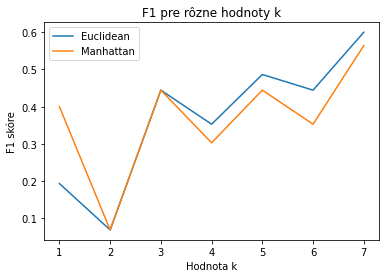

In [113]:
plt.plot(x_axis_k_points_euclidean, f1_euclidean, label="Euclidean")

plt.plot(x_axis_k_points_manhattan, f1_manhattan, label="Manhattan")

plt.xlabel("Hodnota k")
plt.ylabel("F1 skóre")
plt.title("F1 pre rôzne hodnoty k")
plt.legend()
plt.show()


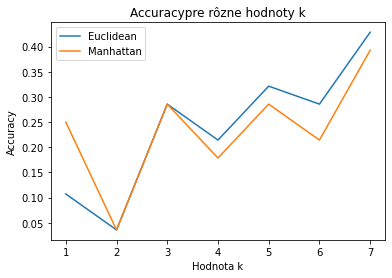

In [114]:
plt.plot(x_axis_k_points_euclidean, accuracies_euclidean, label="Euclidean")

plt.plot(x_axis_k_points_manhattan, accuracies_manhattan, label="Manhattan")

plt.xlabel("Hodnota k")
plt.ylabel("Accuracy")
plt.title("Accuracy pre rôzne hodnoty k")
plt.legend()
plt.show()


Zobrazenie kľúčových bodov pre metódu SIFT

In [118]:
original_face = cv2.imread('data/cats/cat_1.jpg')
gray_face = cv2.cvtColor(original_face, cv2.COLOR_BGR2GRAY)

In [119]:
sift = cv2.SIFT_create()

In [120]:
original_keypoints, _ = sift.detectAndCompute(gray_face, None)

In [121]:
keypoints_without_size = cv2.drawKeypoints(original_face, original_keypoints, None, color=(0, 255, 0))
keypoints_with_size = cv2.drawKeypoints(original_face, original_keypoints, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

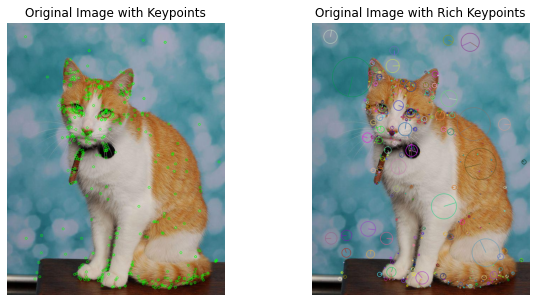

In [122]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(keypoints_without_size, cv2.COLOR_BGR2RGB))
plt.title('Original Image with Keypoints')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(keypoints_with_size, cv2.COLOR_BGR2RGB))
plt.title('Original Image with Rich Keypoints')
plt.axis('off')

plt.show()

Zobrazenie kľúčových bodov pre metódu FAST

In [124]:
original_face = cv2.imread('data/cats/cat_1.jpg')
gray_face = cv2.cvtColor(original_face, cv2.COLOR_BGR2GRAY)

In [125]:
fast = cv2.FastFeatureDetector_create() 

In [126]:
keypoints_with_nonmax = fast.detect(gray_face, None)

In [127]:
fast.setNonmaxSuppression(False)
keypoints_without_nonmax = fast.detect(gray_face, None)

In [128]:
image_with_nonmax = cv2.drawKeypoints(original_face, keypoints_with_nonmax, None, color=(0,255,0),
                                       flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
image_without_nonmax = cv2.drawKeypoints(original_face, keypoints_without_nonmax, None, color=(0,255,0), 
                                          flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

In [129]:
image_with_nonmax = cv2.cvtColor(image_with_nonmax, cv2.COLOR_BGR2RGB)
image_without_nonmax = cv2.cvtColor(image_without_nonmax, cv2.COLOR_BGR2RGB)

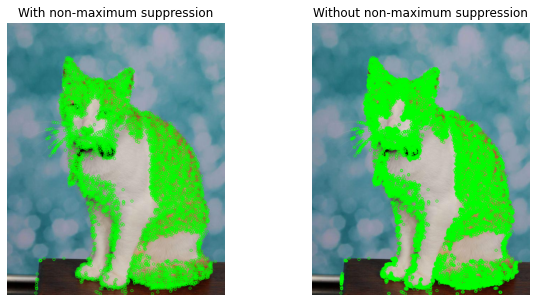

In [130]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image_with_nonmax)
plt.title('With non-maximum suppression')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(image_without_nonmax)
plt.title('Without non-maximum suppression')
plt.axis('off')

plt.show()

Zobrazenie kľúčových bodov pre metódu ORB

In [131]:
original_face = cv2.imread('data/cats/cat_1.jpg')
query_face = cv2.imread('data/cats/cat_1.jpg')

In [132]:
gray_face = cv2.cvtColor(original_face, cv2.COLOR_BGR2GRAY)
query_face_gray = cv2.cvtColor(query_face, cv2.COLOR_BGR2GRAY)

In [133]:
orb = cv2.ORB_create()

In [134]:
original_keypoints, original_descriptor = orb.detectAndCompute(gray_face, None)
query_keypoints, query_descriptor = orb.detectAndCompute(query_face_gray, None)

In [135]:
keypoints_without_size = cv2.drawKeypoints(original_face, original_keypoints, None, color=(0, 255, 0))
keypoints_with_size = cv2.drawKeypoints(original_face, original_keypoints, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

In [136]:
keypoints_without_size = cv2.cvtColor(keypoints_without_size, cv2.COLOR_BGR2RGB)
keypoints_with_size = cv2.cvtColor(keypoints_with_size, cv2.COLOR_BGR2RGB)

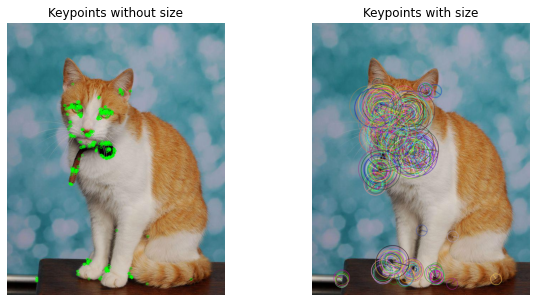

In [137]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(keypoints_without_size)
plt.title('Keypoints without size')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(keypoints_with_size)
plt.title('Keypoints with size')
plt.axis('off')

plt.show()

Presnosť pri klasifikácií pomocou HOG

In [140]:
import os
import cv2
import numpy as np

from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [141]:
DATA = "data"
CLASSES = ["cats", "dogs"]

In [142]:
def get_hog_descriptors(class_name):
    images = os.listdir(os.path.join(DATA, class_name))
    images = [os.path.join(DATA, class_name, name) for name in images]
    descriptors = []
    
    for img_path in images:
        print("Processing image:", img_path)
        img_rgb = cv2.imread(img_path)
        img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)
        
        img_rgb = cv2.resize(img_rgb, (128, 128))
        img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)
        hog = cv2.HOGDescriptor()
        des = hog.compute(img_gray)
        
        descriptors.append(des.flatten())
    return descriptors

In [143]:
Data_hog = {}

for class_name in CLASSES:
    Data_hog[class_name] = np.array(get_hog_descriptors(class_name))
    print("Data extracted successfully for", class_name.upper())

Processing image: data\cats\cat_1.jpg
Processing image: data\cats\cat_106.jpg
Processing image: data\cats\cat_109.jpg
Processing image: data\cats\cat_113.jpg
Processing image: data\cats\cat_114.jpg
Processing image: data\cats\cat_116.jpg
Processing image: data\cats\cat_118.jpg
Processing image: data\cats\cat_119.jpg
Processing image: data\cats\cat_124.jpg
Processing image: data\cats\cat_140.jpg
Processing image: data\cats\cat_147.jpg
Processing image: data\cats\cat_156.jpg
Processing image: data\cats\cat_158.jpg
Processing image: data\cats\cat_162.jpg
Processing image: data\cats\cat_18.jpg
Processing image: data\cats\cat_190.jpg
Processing image: data\cats\cat_203.jpg
Processing image: data\cats\cat_223.jpg
Processing image: data\cats\cat_234.jpg
Processing image: data\cats\cat_244.jpg
Processing image: data\cats\cat_251.jpg
Processing image: data\cats\cat_255.jpg
Processing image: data\cats\cat_268.jpg
Processing image: data\cats\cat_279.jpg
Processing image: data\cats\cat_281.jpg
Pro

In [144]:
labels_cats = np.zeros(len(Data_hog['cats']))
labels_dogs = np.ones(len(Data_hog['dogs']))

In [145]:
x_train_cats, x_test_cats, y_train_cats, y_test_cats = train_test_split(Data_hog['cats'], labels_cats, test_size=0.3)
x_train_dogs, x_test_dogs, y_train_dogs, y_test_dogs = train_test_split(Data_hog['dogs'], labels_dogs, test_size=0.3)

In [146]:
x_train = np.concatenate((x_train_cats, x_train_dogs), axis=0)
x_test = np.concatenate((x_test_cats, x_test_dogs), axis=0)
y_train = np.concatenate((y_train_cats, y_train_dogs), axis=0)
y_test = np.concatenate((y_test_cats, y_test_dogs), axis=0)

In [147]:
RFC = RandomForestClassifier(n_estimators=500)

In [148]:
ANN = MLPClassifier(hidden_layer_sizes=(100,), activation='logistic', max_iter=1000)

In [149]:
RFC.fit(x_train, y_train)
ANN.fit(x_train, y_train)

MLPClassifier(activation='logistic', max_iter=1000)

In [150]:
for model, clf in zip(["Random Forest", "Artificial Neural Network"], [RFC, ANN]):
    pred = clf.predict(x_test)
    acc = accuracy_score(y_test, pred)

    print(f"{model} Accuracy:", acc)

Random Forest Accuracy: 0.5714285714285714
Artificial Neural Network Accuracy: 0.5


Presnosť pri klasifikácií pomocou SIFT

In [151]:
DATA = "data"
CLASSES = ["cats", "dogs"]

In [152]:
def get_sift_descriptors(class_name):
    images = os.listdir(os.path.join(DATA, class_name))
    images = [os.path.join(DATA, class_name, name) for name in images]
    descriptors = []

    sift = cv2.SIFT_create()

    for img_path in images:
        print("Processing image:", img_path)
        img_gray = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        
        keypoints, des = sift.detectAndCompute(img_gray, None)
        
        if des is not None:
            descriptors.extend(des)
    
    return np.array(descriptors)

In [153]:
Data_sift = {}

for class_name in CLASSES:
    Data_sift[class_name] = get_sift_descriptors(class_name)
    print("Data extracted successfully for", class_name.upper())

Processing image: data\cats\cat_1.jpg
Processing image: data\cats\cat_106.jpg
Processing image: data\cats\cat_109.jpg
Processing image: data\cats\cat_113.jpg
Processing image: data\cats\cat_114.jpg
Processing image: data\cats\cat_116.jpg
Processing image: data\cats\cat_118.jpg
Processing image: data\cats\cat_119.jpg
Processing image: data\cats\cat_124.jpg
Processing image: data\cats\cat_140.jpg
Processing image: data\cats\cat_147.jpg
Processing image: data\cats\cat_156.jpg
Processing image: data\cats\cat_158.jpg
Processing image: data\cats\cat_162.jpg
Processing image: data\cats\cat_18.jpg
Processing image: data\cats\cat_190.jpg
Processing image: data\cats\cat_203.jpg
Processing image: data\cats\cat_223.jpg
Processing image: data\cats\cat_234.jpg
Processing image: data\cats\cat_244.jpg
Processing image: data\cats\cat_251.jpg
Processing image: data\cats\cat_255.jpg
Processing image: data\cats\cat_268.jpg
Processing image: data\cats\cat_279.jpg
Processing image: data\cats\cat_281.jpg
Pro

In [154]:
labels_cats = np.zeros(len(Data_sift['cats']))
labels_dogs = np.ones(len(Data_sift['dogs']))

In [155]:
x = np.concatenate((Data_sift['cats'], Data_sift['dogs']), axis=0)
y = np.concatenate((labels_cats, labels_dogs), axis=0)

In [156]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, stratify=y)

In [157]:
RFC = RandomForestClassifier(n_estimators=500)
ANN = MLPClassifier(hidden_layer_sizes=(100,), activation='logistic', max_iter=1000)

RFC.fit(x_train, y_train)
ANN.fit(x_train, y_train)

MLPClassifier(activation='logistic', max_iter=1000)

In [158]:
for model, clf in zip(["Random Forest", "Artificial Neural Network"], [RFC, ANN]):
    pred = clf.predict(x_test)
    acc = accuracy_score(y_test, pred)
    print(f"{model} Accuracy:", acc)

Random Forest Accuracy: 0.6032600107455517
Artificial Neural Network Accuracy: 0.5874103220505041


Presnosť pri klasifikácií pomocou ORB

In [159]:
DATA = "data"
CLASSES = ["cats", "dogs"]

In [160]:
def get_orb_descriptors(class_name):
    images = os.listdir(os.path.join(DATA, class_name))
    images = [os.path.join(DATA, class_name, name) for name in images]
    descriptors = []
    
    orb = cv2.ORB_create()
    
    for img_path in images:
        print("Processing image:", img_path)
        img_gray = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        
        keypoints, des = orb.detectAndCompute(img_gray, None)
        
        if des is not None:
            descriptors.extend(des)
    
    return np.array(descriptors)

In [163]:
Data_orb = {}

for class_name in CLASSES:
    Data_orb[class_name] = get_orb_descriptors(class_name)
    
    print("Data extracted successfully for", class_name.upper())

Processing image: data\cats\cat_1.jpg
Processing image: data\cats\cat_106.jpg
Processing image: data\cats\cat_109.jpg
Processing image: data\cats\cat_113.jpg
Processing image: data\cats\cat_114.jpg
Processing image: data\cats\cat_116.jpg
Processing image: data\cats\cat_118.jpg
Processing image: data\cats\cat_119.jpg
Processing image: data\cats\cat_124.jpg
Processing image: data\cats\cat_140.jpg
Processing image: data\cats\cat_147.jpg
Processing image: data\cats\cat_156.jpg
Processing image: data\cats\cat_158.jpg
Processing image: data\cats\cat_162.jpg
Processing image: data\cats\cat_18.jpg
Processing image: data\cats\cat_190.jpg
Processing image: data\cats\cat_203.jpg
Processing image: data\cats\cat_223.jpg
Processing image: data\cats\cat_234.jpg
Processing image: data\cats\cat_244.jpg
Processing image: data\cats\cat_251.jpg
Processing image: data\cats\cat_255.jpg
Processing image: data\cats\cat_268.jpg
Processing image: data\cats\cat_279.jpg
Processing image: data\cats\cat_281.jpg
Pro

In [164]:
labels_cats = np.zeros(len(Data_orb['cats']))
labels_dogs = np.ones(len(Data_orb['dogs']))

In [165]:
x_train_cats, x_test_cats, y_train_cats, y_test_cats = train_test_split(Data_orb['cats'], labels_cats, test_size=0.3)

x_train_dogs, x_test_dogs, y_train_dogs, y_test_dogs = train_test_split(Data_orb['dogs'], labels_dogs, test_size=0.3)

In [166]:
x_train = np.concatenate((x_train_cats, x_train_dogs), axis=0)
x_test = np.concatenate((x_test_cats, x_test_dogs), axis=0)
y_train = np.concatenate((y_train_cats, y_train_dogs), axis=0)
y_test = np.concatenate((y_test_cats, y_test_dogs), axis=0)

In [167]:
RFC = RandomForestClassifier(n_estimators=500)
ANN = MLPClassifier(hidden_layer_sizes=(100,), activation='logistic', max_iter=1000)

RFC.fit(x_train, y_train)
ANN.fit(x_train, y_train)

MLPClassifier(activation='logistic', max_iter=1000)

In [168]:
for model, clf in zip(["Random Forest", "Artificial Neural Network"], [RFC, ANN]):
    pred = clf.predict(x_test)
    acc = accuracy_score(y_test, pred)
    print(f"{model} Accuracy:", acc)

Random Forest Accuracy: 0.6283822236018418
Artificial Neural Network Accuracy: 0.5359822029075483
